## NAME: Mumbai Real Estate Investment Intelligence System

# Project overview 
##### The Mumbai Real Estate Investment Intelligence System is a data science–driven analytics project designed to support informed financial decision-making in the real estate domain. The project applies machine learning techniques to predict price per square foot of residential properties in Mumbai using structural, geographic, and categorical features.

##### A robust Random Forest regression pipeline is developed with proper preprocessing for numerical and categorical variables, ensuring stability and generalization across unseen locations and property types. The predictive model serves as the core valuation engine, enabling fair market price estimation while minimizing pricing risk.

##### Beyond price prediction, the project extends into financial analytics by transforming model outputs into actionable investment metrics. Estimated property values are used to compute annual rental income, multi-year appreciation, and return on investment (ROI) under realistic market assumptions. This allows the system to function not only as a valuation model but also as an investment assessment tool.

##### At a market level, the project aggregates predictions to perform location-wise investment analysis, ranking localities based on average ROI, rental potential, and property concentration. This provides insight into high-performing investment zones and supports capital allocation decisions.

##### Overall, the project demonstrates how data science can bridge machine learning and finance, converting raw real estate data into reliable valuation insights, risk-aware predictions, and investment intelligence suitable for real-world applications.

## Github-link:
## streamlit-link:

## Importing all the necessary libraries that we will be using in this project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
import warnings
warnings.filterwarnings("ignore")


## Now loading the dataset and doing basic validation

In [2]:
DATA_PATH = r"mumbai-house-price-data-cleaned.csv"

df = pd.read_csv(DATA_PATH)

# Basic validation
assert df.isnull().sum().sum() == 0, "Dataset contains missing values"
assert "price_per_sqft" in df.columns, "Target column missing"

print("Dataset shape:", df.shape)


Dataset shape: (71938, 15)


## Defining the numerical and catogorical features with also declaring the x and y

In [3]:
TARGET = "price_per_sqft"

NUM_FEATURES = [
    "area",
    "bedroom_num",
    "bathroom_num",
    "balcony_num",
    "age",
    "total_floors",
    "latitude",
    "longitude"
]

CAT_FEATURES = [
    "city",
    "locality",
    "property_type",
    "furnished"
]

X = df[NUM_FEATURES + CAT_FEATURES]
y = df[TARGET]


## Basic EDA for understanding the data better 

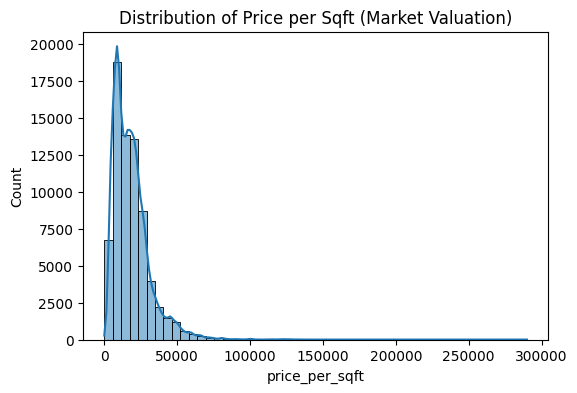

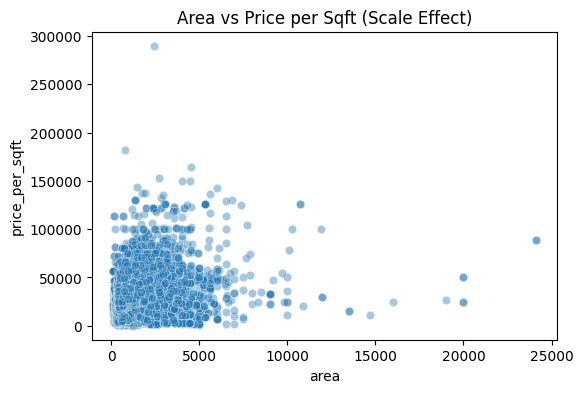

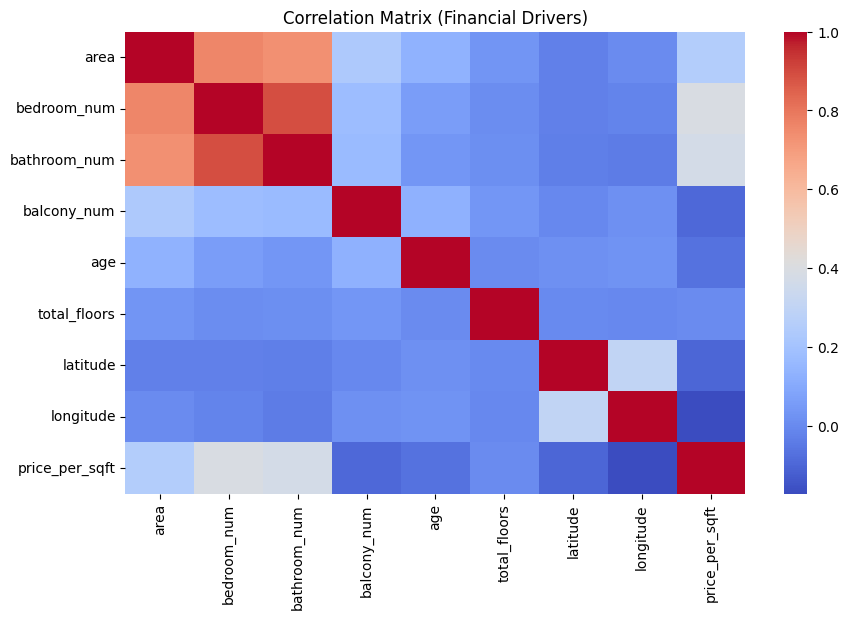

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Price per Sqft (Market Valuation)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["area"], y=y, alpha=0.4)
plt.title("Area vs Price per Sqft (Scale Effect)")
plt.show()

corr = df[NUM_FEATURES + [TARGET]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix (Financial Drivers)")
plt.show()


## spliting the data into traing and testion part 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (57550, 12)
Test size: (14388, 12)


## preprocessing the pipeline 

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", NUM_FEATURES),
        ("cat", OneHotEncoder(handle_unknown="ignore",), CAT_FEATURES)
    ]
)


## Creating the ML model 

In [7]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ]
)


## Model training and evaluation

In [8]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Avg Pricing Error): {mae:.2f}")
print(f"RMSE (Risk Exposure)   : {rmse:.2f}")
print(f"R²   (Explained Value) : {r2:.4f}")


MAE  (Avg Pricing Error): 1996.03
RMSE (Risk Exposure)   : 4053.25
R²   (Explained Value) : 0.8964


## Cross-validation

In [ ]:
cv_scores = cross_val_score(
    pipeline, X, y,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

print("CV MAE:", -cv_scores.mean())


# Features important 

In [ ]:
feature_names = (
    NUM_FEATURES +
    list(
        pipeline.named_steps["preprocessor"]
        .named_transformers_["cat"]
        .get_feature_names_out(CAT_FEATURES)
    )
)

importances = pipeline.named_steps["model"].feature_importances_

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(fi.head(15))


## Saving the modal 

In [ ]:
joblib.dump(pipeline, "mumbai_real_estate_investment_model.pkl")
print("Model saved successfully")


In [ ]:
sample_property = pd.DataFrame([{
    "area": 900,
    "bedroom_num": 2,
    "bathroom_num": 2,
    "balcony_num": 1,
    "age": 5,
    "total_floors": 15,
    "latitude": 19.0760,
    "longitude": 72.8777,
    "city": "Mumbai",
    "locality": "Andheri West",
    "property_type": "Apartment",
    "furnished": "Semi-Furnished"
}])

predicted_price_sqft = pipeline.predict(sample_property)[0]
estimated_value = predicted_price_sqft * sample_property["area"].iloc[0]

print("Predicted price/sqft:", predicted_price_sqft)
print("Estimated property value:", estimated_value)


In [ ]:
1